#  Fish Classification
https://www.kaggle.com/datasets/crowww/a-large-scale-fish-dataset

### Fish dataset have 9 type of fish. Use CNN and try to classify images.

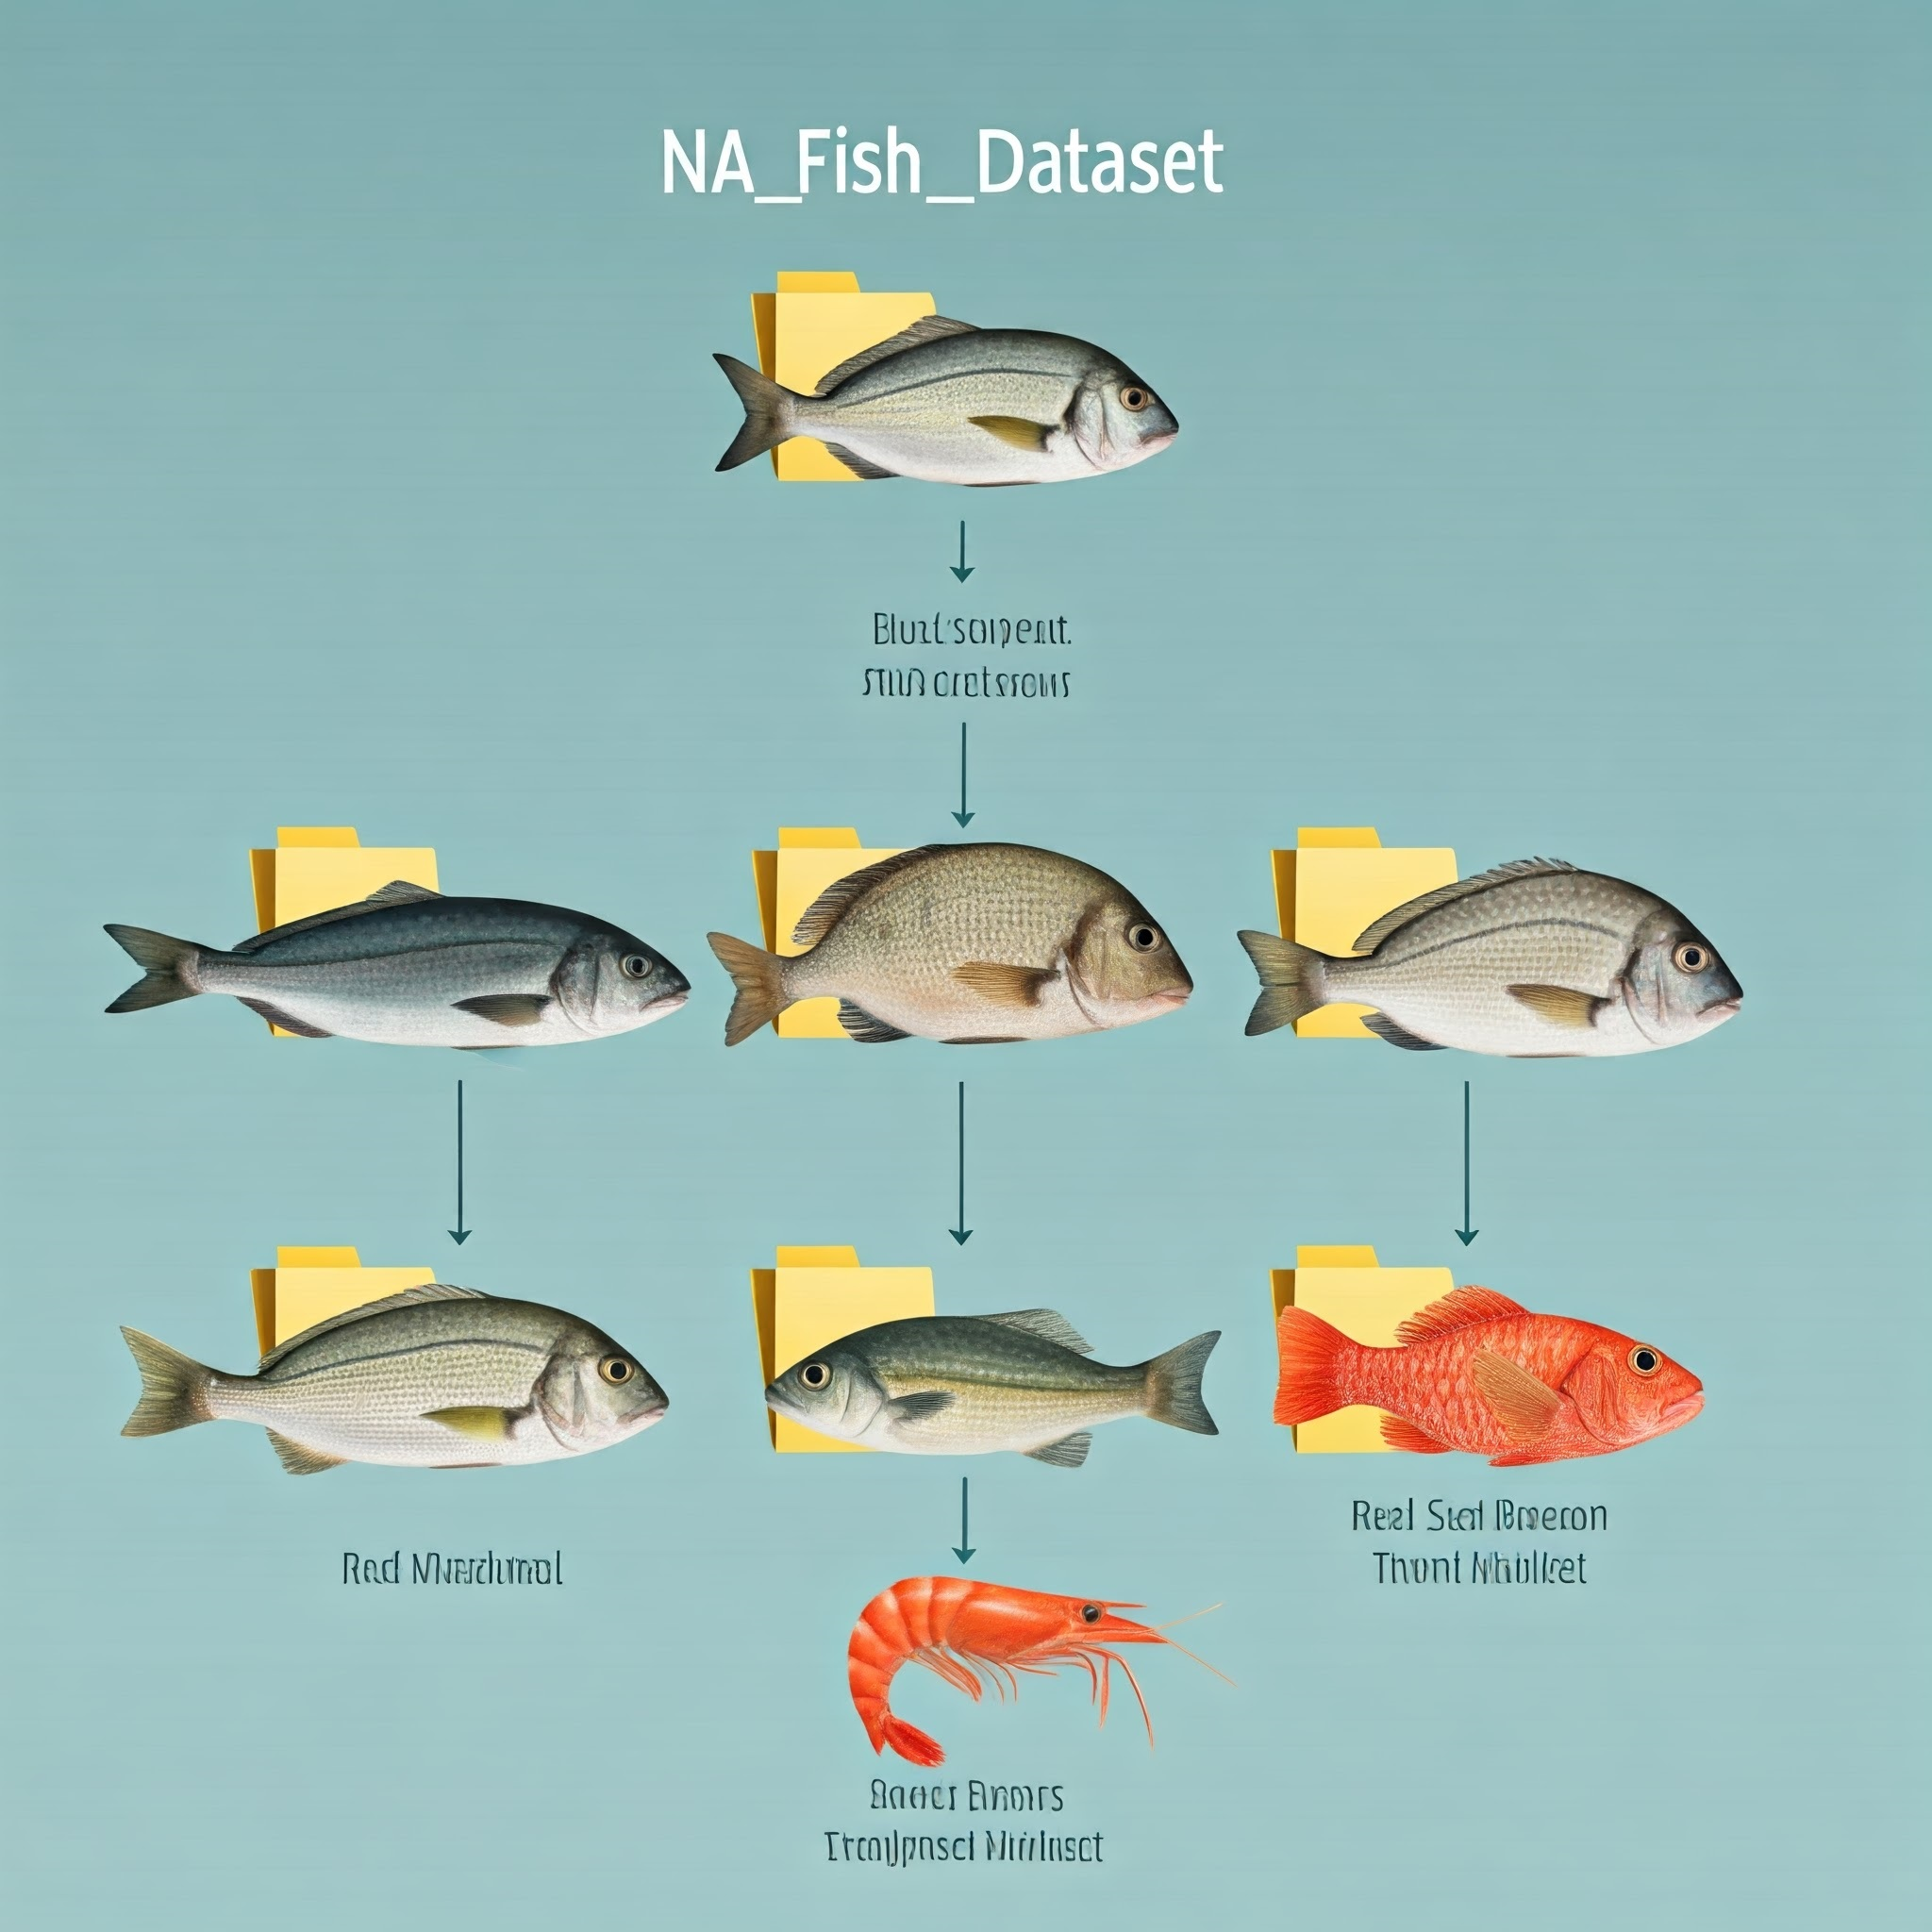

# 🎣 Fish Species Classification Model 🎣

## 1. Importing Required Libraries 🐠

In [1]:
import tensorflow as tf  # TensorFlow kütüphanesini içe aktar
from tensorflow.keras import layers, models, regularizers  # Keras katmanlarını, modellerini ve düzenleyicilerini içe aktar
import numpy as np  # NumPy kütüphanesini içe aktar
import os  # İşletim sistemi işlemleri için os modülünü içe aktar
import matplotlib.pyplot as plt  # Görselleştirme için matplotlib kütüphanesini içe aktar
from sklearn.model_selection import train_test_split  # Veri bölme için sklearn'den train_test_split'i içe aktar

## 2. Defining Data Path and Number of Classes 📂

In [2]:
data_path = '/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/'  # Veri yolunu güncelle
num_classes = 9  # Sınıf sayısını belirle

print(f"Kullanılan veri yolu: {data_path}")  # Kullanılan veri yolunu yazdır

# Veri yolunun doğruluğunu kontrol et
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Belirtilen yol bulunamadı: {data_path}")

Kullanılan veri yolu: /kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/


## 3. Data Loading and Preprocessing Function 🔍

In [3]:
def load_data(path, size=(224, 224)):  # Veri yükleme ve ön işleme fonksiyonunu tanımla
    images = []  # Görüntüleri saklamak için boş bir liste oluştur
    labels = []  # Etiketleri saklamak için boş bir liste oluştur
    classes = os.listdir(path)  # Veri yolundaki sınıf klasörlerini listele
    for i, class_name in enumerate(classes):  # Her sınıf için döngü başlat
        class_path = os.path.join(path, class_name)  # Sınıf yolunu oluştur
        for image_name in os.listdir(class_path):  # Sınıf içindeki her görüntü için döngü başlat
            image_path = os.path.join(class_path, image_name)  # Görüntü yolunu oluştur
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=size)  # Görüntüyü yükle ve boyutlandır
            image = tf.keras.preprocessing.image.img_to_array(image)  # Görüntüyü diziye çevir
            images.append(image)  # Görüntüyü listeye ekle
            labels.append(i)  # Etiketi listeye ekle
    return np.array(images), np.array(labels)  # Görüntü ve etiket dizilerini döndür

## 4. Loading and Splitting Data 📥

In [4]:
images, labels = load_data(data_path)  # Veriyi yükle
images = images / 255.0  # Görüntüleri normalize et
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)  # Veriyi eğitim ve test setlerine böl

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## 5. Creating the Model 🏗️

In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

## 6. Compiling the Model ⚙️

In [21]:
from tensorflow.keras.optimizers import Adam  # Adam optimizasyon algoritmasını içe aktar

# Yeni versiyonlarda `learning_rate` kullanılması tavsiye edilir
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

## 7. Training the Model 🏋️

In [22]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=8)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.1362 - loss: 2.1920 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - val_accuracy: 0.1014 - val_loss: 2.1976 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1488 - loss: 2.1866 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - val_accuracy: 0.0870 - val_loss: 2.2005 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0964 - loss: 2.1814 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - val_accuracy: 0.0870 - val_loss: 2.2098 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1706 - loss: 2.1649 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - val_accuracy: 0.0870 - val_loss: 2.2158 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.161

## 8. Evaluating the Model 📊

In [25]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=2)  # Test setinde modeli değerlendir
print(f'\nTest accuracy: {test_acc:.2f}')  # Test doğruluğunu yazdır

3/3 - 0s - 22ms/step - accuracy: 0.0930 - loss: 2.2228 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00

Test accuracy: 0.09


## 9. Visualizing Training History 📈

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

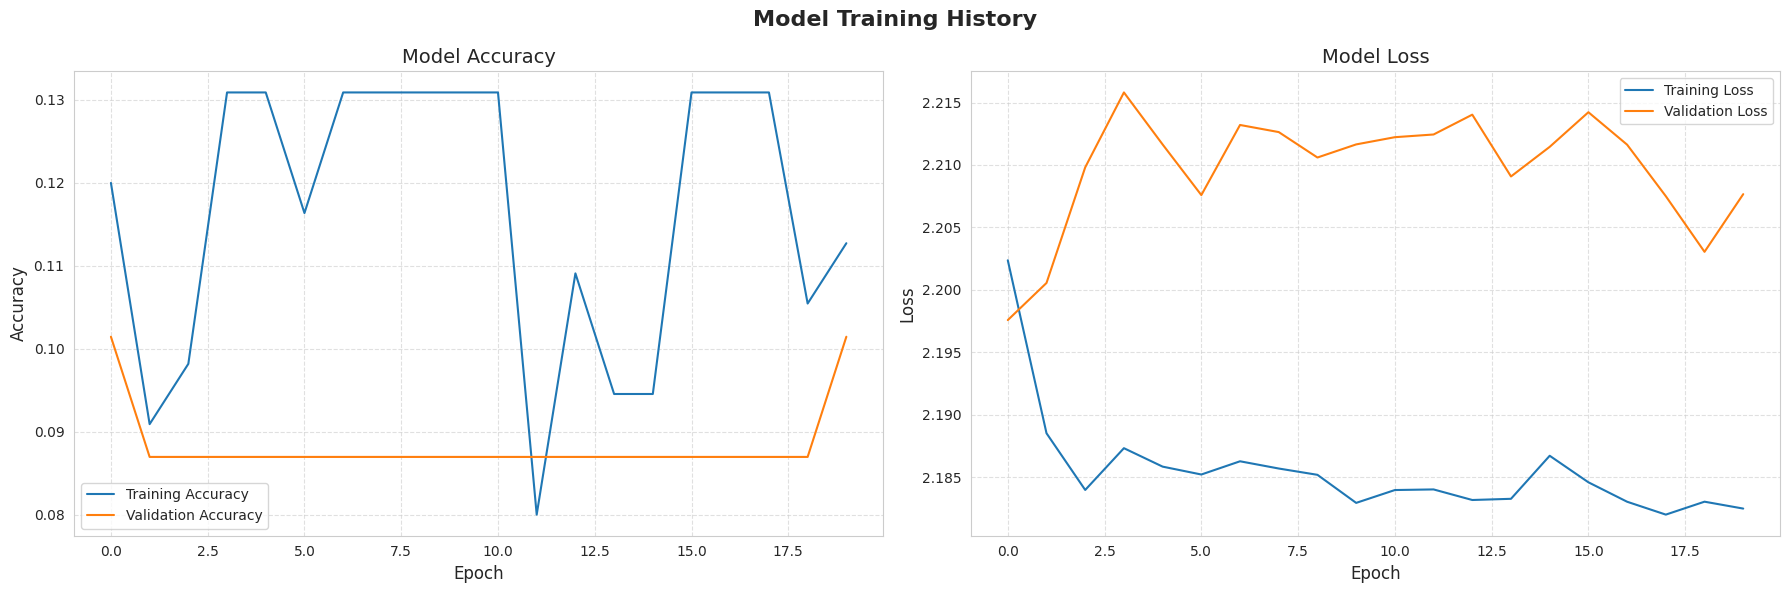

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


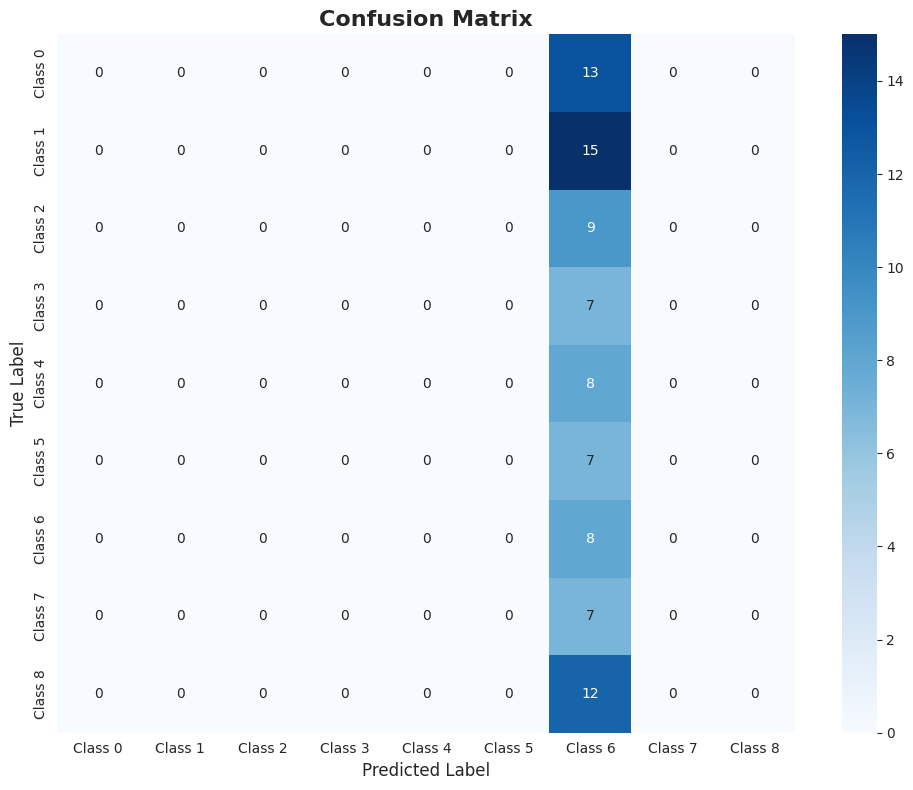

In [24]:
# Gerekli kütüphaneleri içe aktar
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Eğitim sonuçlarını görselleştirme
def plot_training_history(history):
    # Eğitim verilerini bir DataFrame'e dönüştür
    hist_df = pd.DataFrame(history.history)
    hist_df['epoch'] = history.epoch
    
    # Figür ve alt grafikleri oluştur
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle('Model Training History', fontsize=16, fontweight='bold')
    
    # Doğruluk grafiği
    sns.lineplot(data=hist_df, x='epoch', y='accuracy', label='Training Accuracy', ax=ax1)
    sns.lineplot(data=hist_df, x='epoch', y='val_accuracy', label='Validation Accuracy', ax=ax1)
    ax1.set_title('Model Accuracy', fontsize=14)
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Accuracy', fontsize=12)
    ax1.legend(fontsize=10)
    ax1.grid(True, linestyle='--', alpha=0.6)
    
    # Kayıp grafiği
    sns.lineplot(data=hist_df, x='epoch', y='loss', label='Training Loss', ax=ax2)
    sns.lineplot(data=hist_df, x='epoch', y='val_loss', label='Validation Loss', ax=ax2)
    ax2.set_title('Model Loss', fontsize=14)
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Loss', fontsize=12)
    ax2.legend(fontsize=10)
    ax2.grid(True, linestyle='--', alpha=0.6)
    
    # Grafik stilini ayarla
    sns.set_style("whitegrid")
    plt.tight_layout()
    plt.show()

# Eğitim sonrası görselleştirmeyi çağır
plot_training_history(history)

# Konfüzyon matrisini görselleştirme
def plot_confusion_matrix(y_true, y_pred, class_names):
    # Konfüzyon matrisini hesapla
    cm = tf.math.confusion_matrix(y_true, y_pred)
    
    # Figür oluştur
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.tight_layout()
    plt.show()

# Test seti üzerinde tahminler yap
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Sınıf isimlerini tanımla (örnek olarak)
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 
               'Class 5', 'Class 6', 'Class 7', 'Class 8']

# Konfüzyon matrisini çiz
plot_confusion_matrix(y_true_classes, y_pred_classes, class_names);

## 10. Saving the Model 💾

In [27]:
model.save('fish_classification_model.h5')
print("Model successfully saved.")

Model successfully saved.
